<a href="https://colab.research.google.com/github/julissah/Inteligencia-Artificial/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as pl
import numpy as np
import math
import pandas as pd

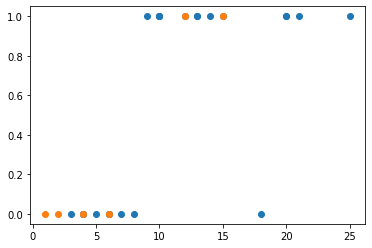

In [138]:
def gen_data():

  # train
  x = np.array([5,7,13,9,4,6,3,10,4,10,8,20,18,15,20,12,6,13,14,10,21,25])
  y = np.array([0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1])

  # test  
  x_test = np.array([2,15,4,1,12,6])
  y_test = np.array([0,1,0,0,1,0])
  return x, y, x_test, y_test
x,y, x_test, y_test = gen_data()
pl.scatter(x,y)
pl.scatter(x_test,y_test)


In [186]:
def reg_logistica(x, y, m, b, alpha, iters, umbral):

    data = len(x)
    for n in range(iters):
      txt.write('ITERACIÓN: {}'.format(n+1)+'\n')
      txt.write('Pendiente anterior: {0:.6f}'.format(m)+'\n')
      txt.write('Intercepto anterior: {0:.6f}'.format(b)+'\n')
      sum_err = 0
      sum_pendiente = 0
      sum_intercepto = 0
      for i in range(data):
        _x = x[i]
        _y = y[i]
        v_est = 1/(1 + math.exp((-(m*_x+b))))
        sum_err += -(_y*math.log(v_est)+(1-_y)*math.log(1-v_est))
        sum_pendiente += (v_est-_y)*_x
        sum_intercepto += v_est-_y
      m = m - alpha * sum_pendiente
      b = b - alpha * sum_intercepto
      txt.write('Error: {0:.6f}'.format(sum_err)+'\n')
      txt.write('Tasa de aprendizaje: {}'.format(alpha)+'\n')
      txt.write('Derivada pendiente: {0:.6f}'.format(sum_pendiente)+'\n')
      txt.write('Derivada intercepto: {0:.6f}'.format(sum_intercepto)+'\n')
      txt.write('Pendiente nueva: {0:.6f}'.format(m)+'\n')
      txt.write('Intercepto nuevo: {0:.6f}'.format(b)+'\n\n')
    test(m,b)
    chart(m,b)

In [177]:
def test(m,b):
  txt.write('TEST: \n')
  data_test = len(x_test)
  p_a = 0
  for t in range(data_test):
    _x_test = x_test[t]
    _y_test = y_test[t]
    v_est_test = 1/(1 + math.exp((-(m*_x_test+b))))
    if round(v_est_test) == _y_test :
      result = 'Correcto'
      p_a += 1
    else:
      result = 'Incorrecto'
    txt.write('Dato {}'.format(t+1)+': {}'.format(_x_test)+' = {0:.6f}'.format(v_est_test)+', Aprobado estimado {}'.format(_y_test)+', '+result +'\n')
  txt.write('Porcentaje de Acierto {0:.2f}'.format(100/(data_test/p_a))+'%')

In [191]:
def chart(m,b):
  s_X = np.arange(1, 25, 0.5)
  s_Y=1/(1+np.e**-(m*s_X+b))
  pl.plot(s_X,s_Y)
  pl.scatter(x, y)
  pl.scatter(x_test,y_test)
  pl.title('100000 Iteraciones')
  pl.plot([0,25], [0.5, 0.5],"m")

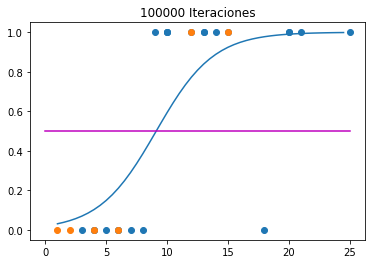

In [192]:
m = -0.9874
b = -2.1789
alpha = 0.001
iters = 100000
umbral = 0.5

txt = open ('RegresionLogistica.txt','w')
txt.write('Alumna: Julissa Huaman Hilari\n')
txt.write('Método: Regresion Logística\n\n')
txt.write('Pendiente anterior: {}'.format(m)+'\n')
txt.write('Intercepto anterior: {}'.format(b)+'\n')
txt.write('Tasa de aprendizaje: {}'.format(alpha)+'\n')
txt.write('Cantidad de iteraciones: {}'.format(iters)+'\n')
txt.write('Umbral: {}'.format(umbral)+'\n')
txt.write('Datos de Entrenamiento: '+'\n'+' x = {}'.format(x)+'\n'+' y = {}'.format(y)+'\n')
txt.write('Datos de Test: '+'\n'+' x = {}'.format(x_test)+'\n'+' y = {}'.format(y_test)+'\n\n')
reg_logistica(x, y, m, b, alpha, iters, umbral)